**UTS Machine Learning**
---
*   Nama : Hurin Salimah
*   NIM  : 1103200021

*   Dataset : Breast Cancer
*   Model : Classification with XGBoost

In [1]:
# Import library untuk manipulasi data numerik
import numpy as np
# Import library untuk manipulasi data tabular
import pandas as pd
# Import library untuk visualisasi data
import seaborn as sns
# Import library untuk visualisasi data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [2]:
# Import Google Drive API
from google.colab import drive

# Login ke Google Drive
drive.mount('/content/drive')

MessageError: ignored

In [3]:
# Load dataset college dari google drive
dataset = pd.read_csv('/content/drive/MyDrive/machine learning/breast cancer.csv')

In [4]:
# Menampilkan dataset dari google drive
print(dataset.head())

   Unnamed: 0  mean radius  mean texture  mean perimeter  mean area  \
0           0        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           2        19.69         21.25          130.00     1203.0   
3           3        11.42         20.38           77.58      386.1   
4           4        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean symmetry  ...  worst texture  worst perimeter  worst area  \
0         0.2419  ...          17.33     

In [5]:
# Memuat dataset Breast Cancer dari library sklearn
from sklearn.datasets import load_breast_cancer
# Memuat dataset breast cancer
data = load_breast_cancer()
# Dataset breas cancer dimuat ke dalam dataframe pandas
X = pd.DataFrame(data.data, columns=data.feature_names)
# Diisi dengan target dari dataset breast cancer
y = pd.Series(data.target, name='target')

In [6]:
# EDA (Exploratory Data Analysis)
# Menampilkan informasi dasar tentang dataset
print(X.info())

# Menampilkan statistik deskriptif
print(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

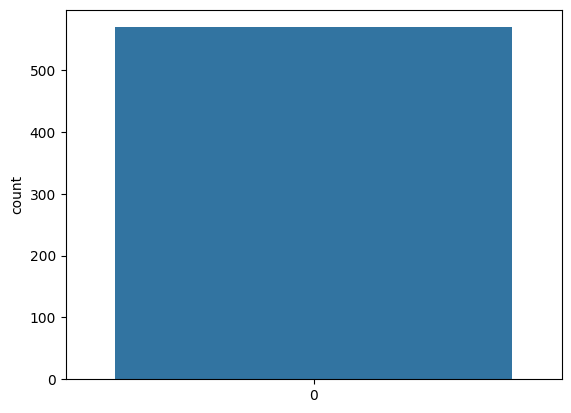

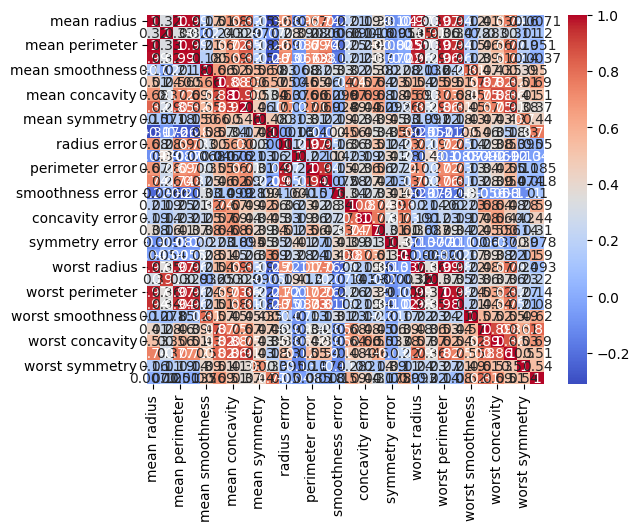

In [7]:
# Menampilkan distribusi dari kelas target
sns.countplot(y)
# Menampilkan plot yang telah dibuat sebelumnya
plt.show()

# Korelasi antar fitur numerik
correlation_matrix = X.corr()
# Memanggil heatmap dari matriks korelasi yang telah dihitung
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Menampilkan plot yang telah dibuat sebelumnya
plt.show()

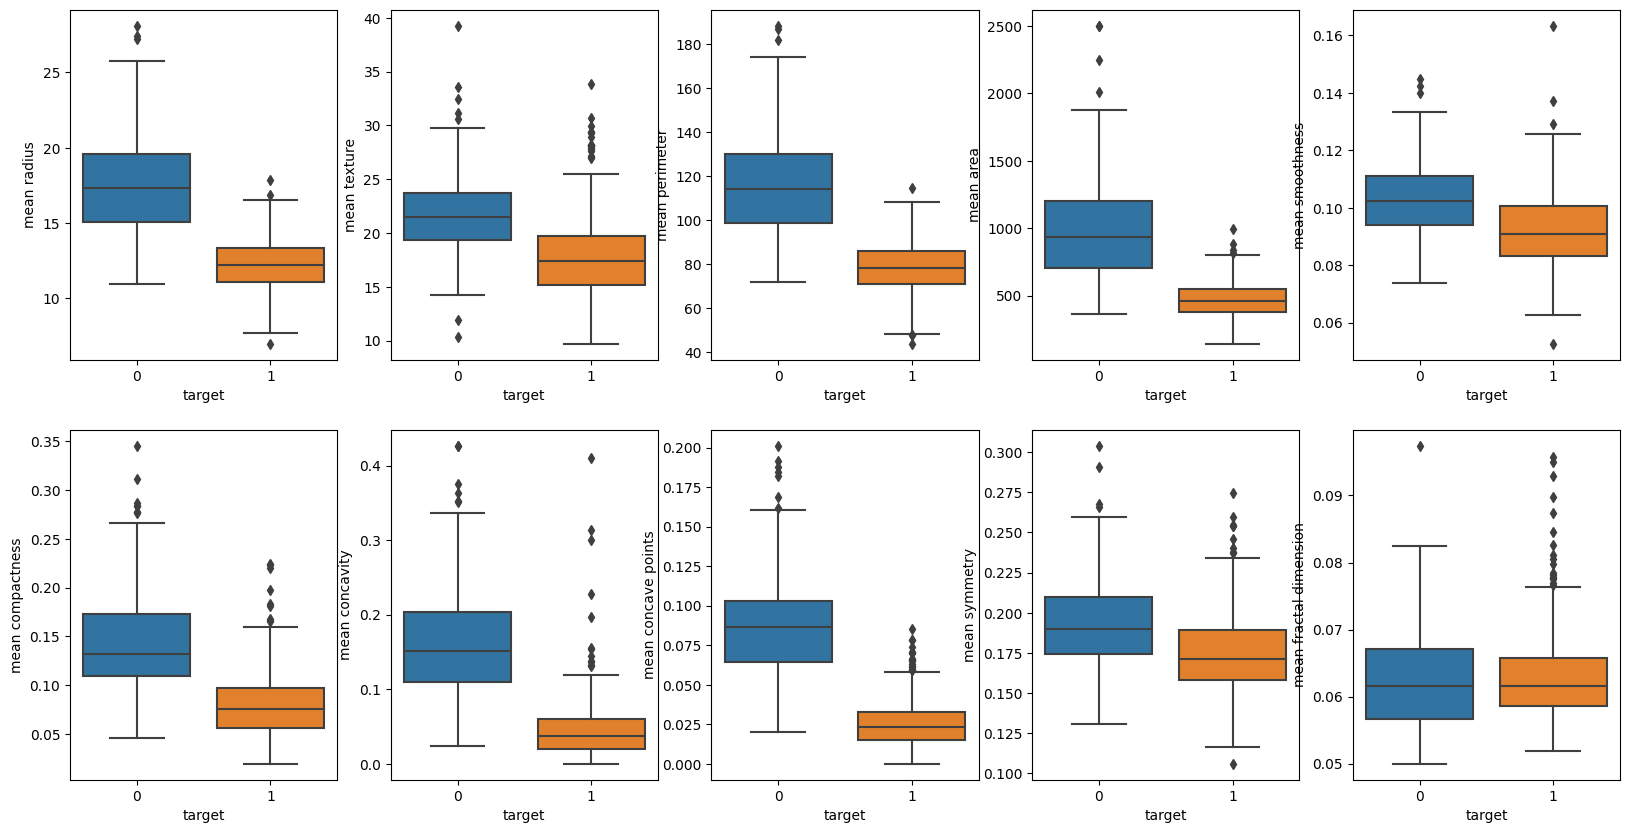

In [8]:
# Visualisasi fitur-fitur utama
num_features = min(len(X.columns), 10)  # Membatasi jumlah fitur yang ditampilkan maksimal 10
# Menyiapkan area gambar untuk visualisasi
plt.figure(figsize=(20, 10))
# Melakukan iterasi melalui fitur dari dataset
for i, feature in enumerate(X.columns[:num_features], 1):
  # Membuat subplot dengan 2 baris dan 5 kolom
    plt.subplot(2, 5, i)
  # Membuat diagram kotak untuk setiap fitur dalam kelas target
    sns.boxplot(x=y, y=feature, data=X)
# Menampilkan plot yang  telah dibuat sebelumnya
plt.show()

In [12]:
# Splitting data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Training model XGBoost untuk klasifikasi
model = XGBClassifier()
# Melakukan prediksi pada dataset
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [14]:
# Memprediksi label/target dari data uji berdasarkan fitur-fitur yang diberikan.
y_pred = model.predict(X_test)
#Menghitung akurasi dari model yang telah melakukan prediksi terhadap data uji
accuracy = accuracy_score(y_test, y_pred)
#Mencetak tingkat akurasi yang telah dihitung sebelumnya dalam format yang lebih mudah dibaca.
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.61%


In [15]:
# Menampilkan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [18]:
# Input data untuk prediksi
input_data = X_train.iloc[[0]]  # Ganti ini dengan data yang ingin Anda prediksi

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = model.predict(input_data)

# Menampilkan hasil prediksi
print(f'Prediction for input data: {prediction[0]}')

Prediction for input data: 1


In [20]:
# Input data untuk prediksi
new_data = np.array([[14.5, 20.5, 95.5, 645.0, 0.1053, 0.187, 0.241, 0.105, 0.193, 0.069, 0.284, 0.071, 0.811, 2.234, 22.88, 0.00865, 0.025, 0.0165, 0.01216, 0.02926, 0.00396, 15.3, 25.27, 101.4, 708.8, 0.1276, 0.3379, 0.2751, 0.1377, 0.3109]])

# Pastikan jumlah kolom sesuai dengan data.feature_names
if new_data.shape[1] == len(data.feature_names):
    # Mengubah array numpy menjadi dataframe pandas
    new_data_df = pd.DataFrame(new_data, columns=data.feature_names)
    # Mencetak judul
    print("New Data:")
    print(new_data_df)

    # Melakukan prediksi menggunakan model yang telah dilatih
    prediction = model.predict(new_data_df)

    # Menampilkan hasil prediksi
    if prediction[0] == 0:
        print("Prediction: Malignant (Class 0)")
    else:
        print("Prediction: Benign (Class 1)")
else:
    print("Jumlah kolom pada new_data tidak sesuai dengan data.feature_names.")

New Data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         14.5          20.5            95.5      645.0           0.1053   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.187           0.241                0.105          0.193   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                   0.069  ...       0.00396           15.3            25.27   

   worst area  worst smoothness  worst compactness  worst concavity  \
0       101.4             708.8             0.1276           0.3379   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2751          0.1377                   0.3109  

[1 rows x 30 columns]
Prediction: Benign (Class 1)
